In [ ]:
pip install lightkurve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=969a472da3dc291964b309d3ac943d9cafe3c2caf96af2b8b77a133d29ddfab2
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=me

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [ ]:
from lightkurve import search_targetpixelfile


In [ ]:
search_result = lk.search_lightcurve('KIC 8462852', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008462852,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008462852,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008462852,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008462852,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008462852,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008462852,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008462852,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008462852,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008462852,0.0


In [ ]:
tpf = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=17).download()

In [ ]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [ ]:
lc.time

<Time object: scale='tdb' format='bkjd' value=[1559.22664094 1559.24707521 1559.26750958 ... 1590.96130619 1590.98174053
 1591.00217508]>

In [ ]:
lc.flux

<Quantity [37821.008, 37826.43 , 37814.734, ..., 37834.94 , 37828.816,
           37825.363] electron / s>

In [ ]:
lc.estimate_cdpp()

<Quantity 123.4039573 ppm>

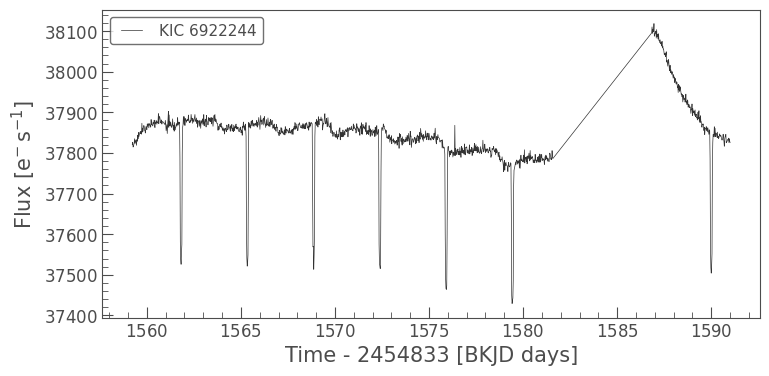

In [ ]:
%matplotlib inline
lc.plot();

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

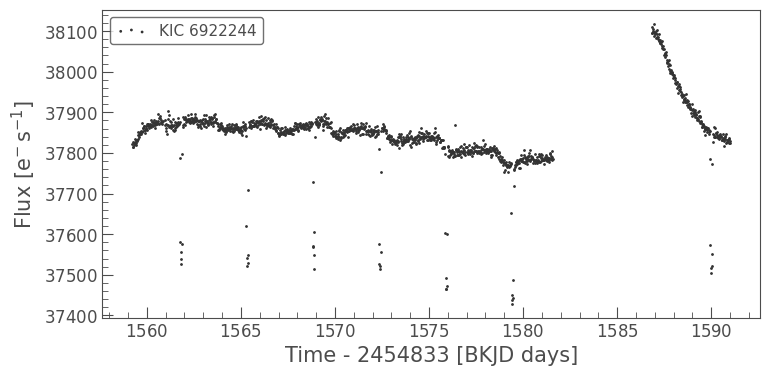

In [ ]:
lc.scatter()

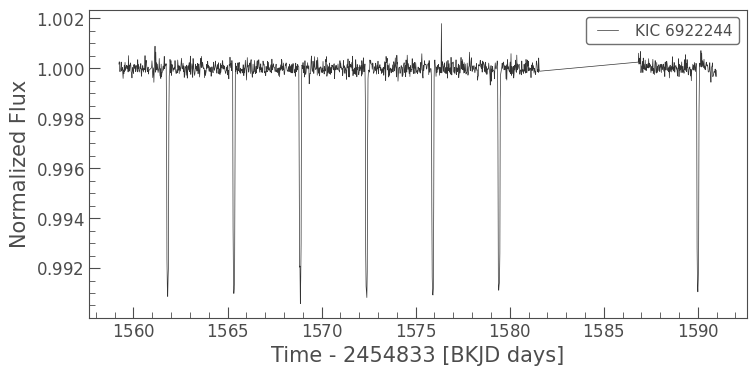

In [ ]:
flat_lc = lc.flatten(window_length=50)
flat_lc.plot();

<Axes: xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

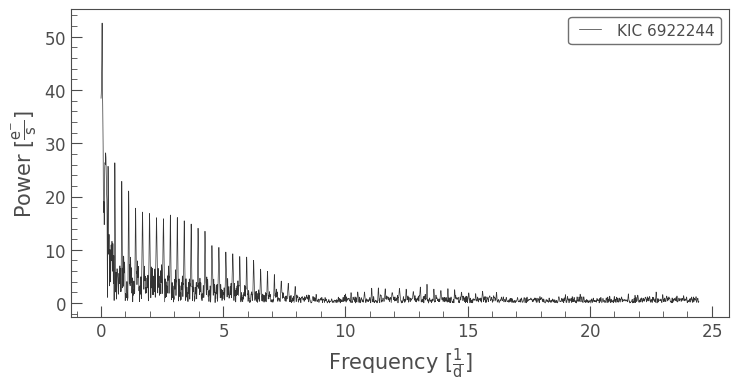

In [ ]:
pg = lc.to_periodogram(oversample_factor=10)
pg.plot()

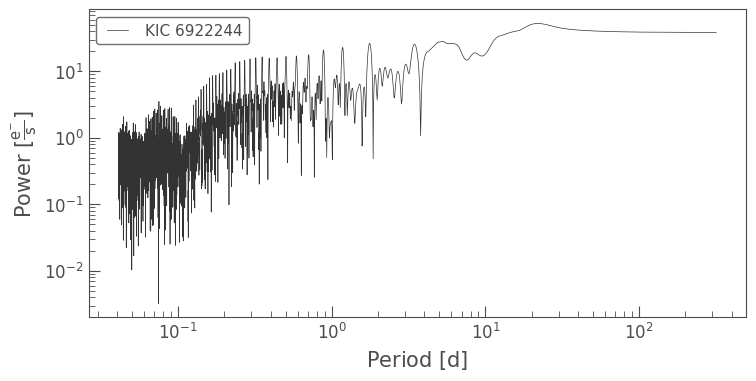

In [ ]:
pg.plot(view='period', scale='log');

In [ ]:
pg.period

<Quantity [3.17755341e+02, 1.58877671e+02, 1.05918447e+02, ...,
           4.08846296e-02, 4.08793698e-02, 4.08741113e-02] d>

In [ ]:
pg.power

<Quantity [38.45583431, 38.69490664, 38.97270174, ...,  0.280682  ,
            0.30803806,  0.32008754] electron / s>

In [ ]:
pg.period_at_max_power

<Quantity 21.18368943 d>

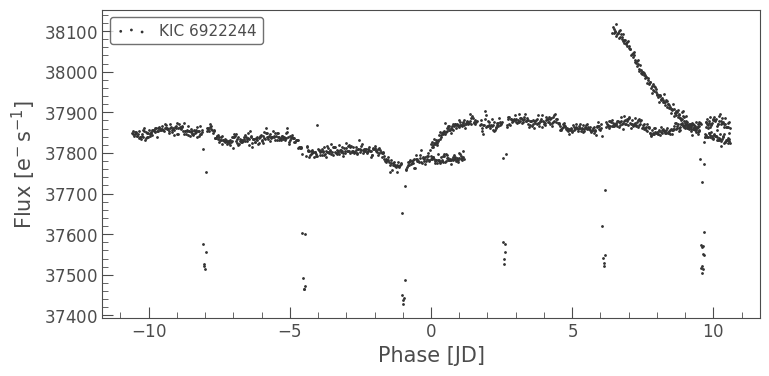

In [ ]:
lc.fold(period=pg.period_at_max_power).scatter();

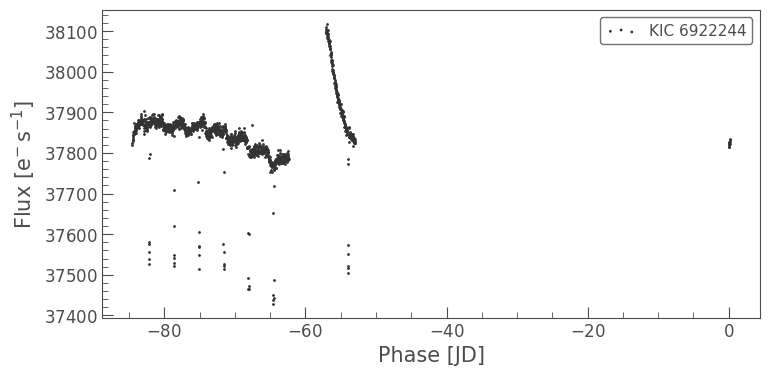

In [ ]:
lc.fold(period=4*pg.period_at_max_power, wrap_phase=0.2).scatter();